# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import operator
from collections import Counter 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [75]:
# Checking the number of mice.
mice = mouse_study_df["Mouse ID"].unique()
len(mice)


249

In [76]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_duplicates = mouse_study_df[mouse_study_df.loc[:, ["Mouse ID", "Timepoint"]].duplicated()]
mouse_duplicates_data = mouse_duplicates["Mouse ID"].unique()
mouse_duplicates_data


array(['g989'], dtype=object)

In [77]:
dictionary = {}
for i in range(0, len(mouse_study_df)):
    dictionary = {
        "Mouse ID": mouse_study_df['Mouse ID'],
        "Timepoint": mouse_study_df['Timepoint'],
        "Tumor Volume (mm3)": mouse_study_df['Tumor Volume (mm3)'],
        "Metastatic Sites": mouse_study_df['Metastatic Sites'],
        "Drug Regimen": mouse_study_df['Drug Regimen'],
        "Sex": mouse_study_df['Sex'],
        "Age_months": mouse_study_df['Age_months'],
        "Weight (g)": mouse_study_df['Weight (g)']
    }
temp =[]
mouse_duplicates_dictionary = {}

for i in range(0, len(mouse_duplicates_data)):
    temp.append(mouse_duplicates_data[i])
dictionary_df = pd.DataFrame(dictionary)
           
#print(mouse_duplicates_dictionary)
dictionary_df
# mouse_duplicates_df = pd.DataFrame(dictionary)
#print(temp)
#type(dictionary_df)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [78]:
temp =[]
for x in range(0, len(mouse_duplicates_data)):
    temp.append(mouse_duplicates_data[x])
        
x = temp[0]



In [79]:
# Optional: Get all the data for the duplicate mouse ID.


mouse_duplicates_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] == x]

mouse_duplicates_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [80]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df.drop_duplicates()
clean_mouse_study_df = mouse_study_df[mouse_study_df["Mouse ID"] != x]
# mice = mouse_study_df["Mouse ID"].unique()
# len(mice)
clean_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [81]:
# Checking the number of mice in the clean DataFrame.
mice = len(clean_mouse_study_df["Mouse ID"].unique())
mice

248

## Summary Statistics

In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_calc = clean_mouse_study_df.groupby("Drug Regimen").mean()
mean = mean_calc["Tumor Volume (mm3)"]

median_calc = clean_mouse_study_df.groupby("Drug Regimen").median()
median = median_calc["Tumor Volume (mm3)"]

var_calc = clean_mouse_study_df.groupby("Drug Regimen").var()
var = var_calc["Tumor Volume (mm3)"]

std_calc = clean_mouse_study_df.groupby("Drug Regimen").std()
std = std_calc["Tumor Volume (mm3)"]

sem_calc = clean_mouse_study_df.groupby("Drug Regimen").sem()
sem = sem_calc["Tumor Volume (mm3)"]

summary_statistics_table = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median,
                                         "Tumor Volume Variance": var, "Tumor Volume Std. Dev.": std, 
                                         "Tumor Volume Std. Err.": sem})
summary_statistics_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

summary_statistics_agg = pd.DataFrame({"mean": clean_mouse_study_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"],
                                       "median":clean_mouse_study_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"],
                                       "var": clean_mouse_study_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"],
                                       "std": clean_mouse_study_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"],
                                       "sem": clean_mouse_study_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]})


summary_statistics_agg 


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [161]:
drugs = [drug for drug in clean_mouse_study_df["Drug Regimen"]]

drugs_count = Counter(drugs)

drugs_count_series = pd.Series(drugs_count)
drugs_count_series = drugs_count_series.sort_values(ascending=False)



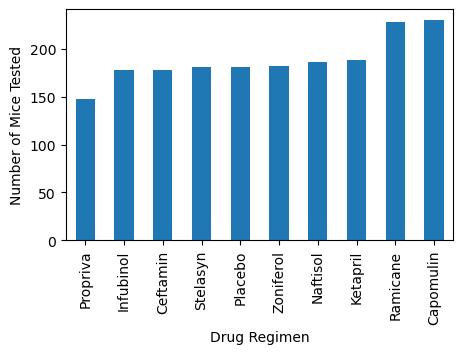

In [162]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drugs_count_series.plot(kind="bar", figsize=(5,3))

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()

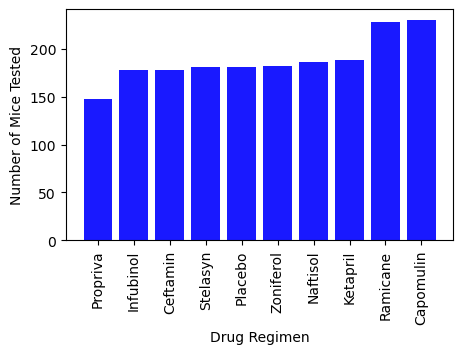

In [163]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


x_axis = np.arange(len(drugs_count_series))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(5,3))
plt.bar(x_axis, drugs_count_series, color='blue', alpha=.9, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.xticks(tick_locations, drugs_count_series.keys(), rotation='vertical')
plt.tight_layout
plt.show()


In [182]:
sex = [sex for sex in clean_mouse_study_df["Sex"]]

sex_count = Counter(sex)

sex_count_series = pd.Series(sex_count)

labels = ['Female','Male']
colors = ['Orange', 'Blue']

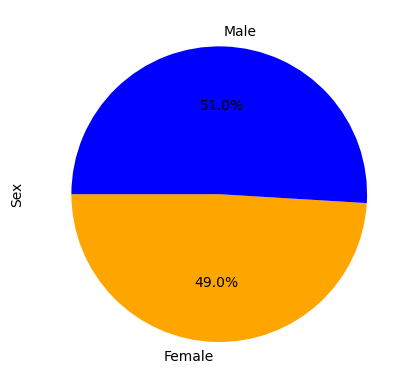

In [183]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_count_series.plot(kind="pie", autopct="%1.1f%%", startangle=180, colors=colors)
plt.ylabel("Sex")
plt.show()

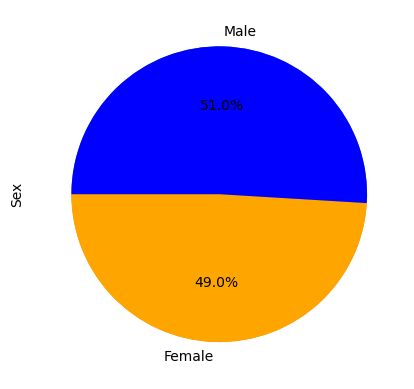

In [184]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female','Male']
colors = ['Orange', 'Blue']

plt.pie(sex_count_series)
plt.pie(sex_count_series, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=180)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [185]:
clean_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [192]:
clean_mouse_study_sorted = clean_mouse_study_df.sort_values('Mouse ID')

print(clean_mouse_study_sorted)
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#final_tumor_volume = 
# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = []
for i in range(0, len(clean_mouse_study_sorted)):
    if(clean_mouse_study_sorted['Mouse ID'][0] != clean_mouse_study_sorted['Mouse ID'][1]):
        final_timepoints = clean_mouse_study_sorted['Timepoint']
#for mouse in clean_mouse_study_df:
print(clean_mouse_study_sorted)
print(final_timepoints)  
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
113      a203          0           45.000000                 0    Infubinol   
389      a203          5           48.508468                 0    Infubinol   
1295     a203         25           56.793208                 1    Infubinol   
1675     a203         40           63.593490                 2    Infubinol   
1577     a203         35           61.931650                 2    Infubinol   
...       ...        ...                 ...               ...          ...   
530      z969         10           52.656081                 1     Naftisol   
1869     z969         45           73.867845                 4     Naftisol   
301      z969          5           49.332999                 0     Naftisol   
1076     z969         20           57.898778                 2     Naftisol   
15       z969          0           45.000000                 0     Naftisol   

         Sex  Age_months  Weight (g)  
113   Female

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


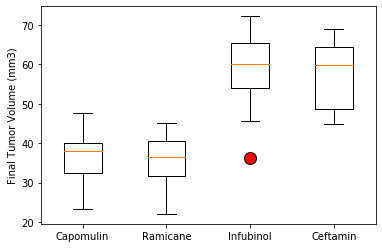

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

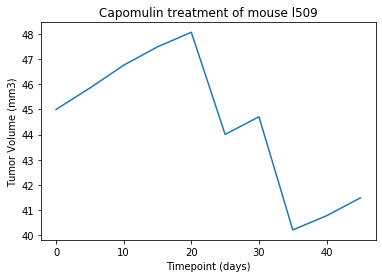

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



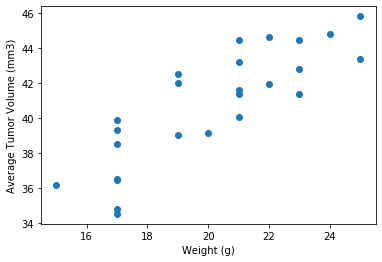

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


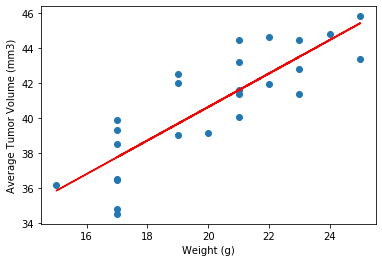

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

